## Import, loading (ex. 1)

In [521]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [522]:
df = pd.read_csv("HR.csv")

## Summary Statistics (ex. 2)

In [523]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [524]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Correlation (ex. 3)

In [526]:
# getting df with only numerical cols
numerics = ['int64', 'float64']
numdf = df.select_dtypes(include=numerics)


In [527]:
corrmat = numdf.corr()
corrmat

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


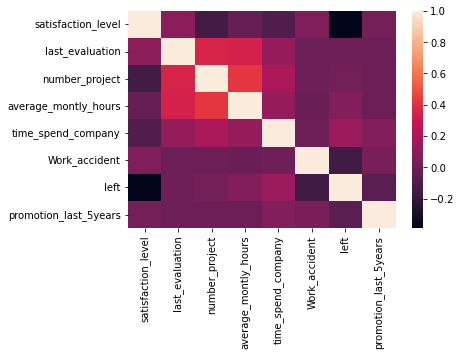

In [528]:
heat = sns.heatmap(corrmat)

In [529]:
# Getting top 2 and bottom 2 corr
corrframe = corrmat.abs().unstack().sort_values(kind='quicksort').to_frame().reset_index().rename(columns={'level_0':'first_var','level_1':'second_var',0:'corr'})
res = pd.concat([corrframe[corrframe['corr'] != 1].nlargest(4, 'corr'), corrframe.nsmallest(4, 'corr')])
res = res.iloc[::2]
res

,first_var,second_var,corr
54,number_project,average_montly_hours,0.417211
52,left,satisfaction_level,0.388375
0,Work_accident,time_spend_company,0.002120
2,average_montly_hours,promotion_last_5years,0.003544


## Distributions (exs. 4, 5, 6)

In [530]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [531]:
df.value_counts('department')

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
dtype: int64

In [532]:
df.value_counts('salary')

salary
low       7316
medium    6446
high      1237
dtype: int64

<AxesSubplot:xlabel='salary', ylabel='count'>

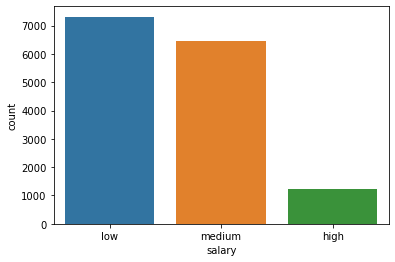

In [533]:
sns.countplot(data=df, x='salary')

In [534]:
df.groupby(['department', 'salary'])['left'].count().to_frame()

left
department  salary      
IT          high      83
            low      609
            medium   535
RandD       high      51
            low      364
            medium   372
accounting  high      74
            low      358
            medium   335
hr          high      45
            low      335
            medium   359
management  high     225
            low      180
            medium   225
marketing   high      80
            low      402
            medium   376
product_mng high      68
            low      451
            medium   383
sales       high     269
            low     2099
            medium  1772
support     high     141
            low     1146
            medium   942
technical   high     201
            low     1372
            medium  1147

<AxesSubplot:xlabel='salary', ylabel='count'>

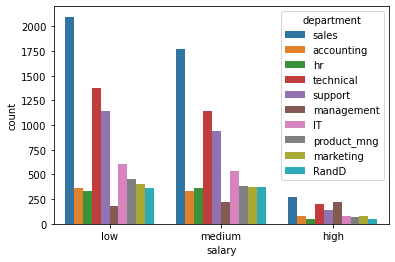

In [535]:
sns.countplot(data=df, x='salary', hue='department')

## Who spend more time at work (ex. 7)

In [536]:
highmean = round(df[df['salary'] == 'high']['average_montly_hours'].mean(),2)
lowmean = round(df[df['salary'] == 'low']['average_montly_hours'].mean(), 2)
print(f'People with high salary spend {highmean} hours, while people with low salary spend {lowmean} hour')

People with high salary spend 199.87 hours, while people with low salary spend 201.0 hour


So the difference is not big, but people with high salary spend less time on average

## Left and Stayed (ex. 8)

In [537]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [538]:
left = df[df['left'] == 0]
stayed = df[df['left'] == 1]
combine = [left, stayed]

print('among people who left there was: ' + str((left['promotion_last_5years'].sum()/left['promotion_last_5years'].count() * 100)) + ' percent who got promotion last 5 years')

among people who left there was: 2.6251312565628284 percent who got promotion last 5 years


## A bit of ML (ex. 9)

In [539]:
# Check missing values before ML
total_na = df.isnull().sum().sort_values(ascending = False)
percent_na = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data_oil = pd.concat([total_na, percent_na], axis = 1, keys = ['Total', 'Percent'])
missing_data_oil.head(15)

,Total,Percent
satisfaction_level,0,0.0
last_evaluation,0,0.0
number_project,0,0.0
average_montly_hours,0,0.0
time_spend_company,0,0.0
Work_accident,0,0.0
left,0,0.0
promotion_last_5years,0,0.0
department,0,0.0
salary,0,0.0


In [540]:
# trying ML without salary and department
y = df['left']
df = df.select_dtypes(include=numerics)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = .25)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11249, 8)
(11249,)
(3750, 8)
(3750,)


In [541]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.7488

In [542]:
# decided to encode categorical data 
enc = {'department': {'sales': 0, 'accounting': 1, 'hr': 2, 'technical': 3, 'support': 4, 'management': 5, 'IT': 6, 'product_mng': 7, 'marketing': 8, 'RandD': 9},
      'salary' : {'low': 0, 'medium': 1, 'high': 2}}
df_no_cat = df.replace(enc)

In [543]:
y = df_no_cat['left']
X_train, X_test, y_train, y_test = train_test_split(df_no_cat, y, test_size = .25)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11249, 8)
(11249,)
(3750, 8)
(3750,)


In [544]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.7672